In [1]:
import pandas as pd
from pandas import DataFrame

import numpy as np
np.random.seed(42)

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm

import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\Zlatana.Nenova\OneDrive - University of Denver\Documents\DU\DU Quarters\Fall 2020\INFO 4300\Week 6\Class 1\Problems\CPS1985WageData.txt',sep='\t')
data.shape

(534, 11)

In [3]:
data.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,5.10,35,2,6,1,1
1,9,0,1,42,0,4.95,57,3,6,1,1
2,12,0,0,1,0,6.67,19,3,6,1,0
3,12,0,0,4,0,4.00,22,3,6,0,0
4,12,0,0,17,0,7.50,35,3,6,0,1


In [4]:
data.describe()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.00000,534.000000,534.000000
mean,13.018727,0.292135,0.458801,17.822097,0.179775,9.024064,36.833333,2.698502,4.14794,0.275281,0.655431
std,2.615373,0.455170,0.498767,12.379710,0.384360,5.139097,11.726573,0.679999,1.65580,0.538453,0.475673
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.00000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,8.000000,0.000000,5.250000,28.000000,3.000000,3.00000,0.000000,0.000000
50%,12.000000,0.000000,0.000000,15.000000,0.000000,7.780000,35.000000,3.000000,4.00000,0.000000,1.000000
75%,15.000000,1.000000,1.000000,26.000000,0.000000,11.250000,44.000000,3.000000,6.00000,0.000000,1.000000
max,18.000000,1.000000,1.000000,55.000000,1.000000,44.500000,64.000000,3.000000,6.00000,2.000000,1.000000


In [5]:
data.rename(columns={"SEX":"FEMALE"},inplace=True)

Occupation, race, and sector are categorical variables <br>
Occupation: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other<br>
Race: 1=Other, 2=Hispanic, 3=White<br>
Sector: 0=Other, 1=Manufacturing, 2=Construction<br>
The first value for each will be dropped as the baseline when constructing dummies

In [6]:
#add dummies
data = data.merge(pd.get_dummies(data.OCCUPATION,drop_first=True,prefix='Occupation'),left_index=True,right_index=True)
data = data.merge(pd.get_dummies(data.RACE,drop_first=True,prefix='Race'),left_index=True,right_index=True)
data = data.merge(pd.get_dummies(data.SECTOR,drop_first=True,prefix='Sector'),left_index=True,right_index=True)
data.drop(columns=['OCCUPATION','RACE','SECTOR'],inplace=True)
data.head()

,EDUCATION,SOUTH,FEMALE,EXPERIENCE,UNION,WAGE,AGE,MARR,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Race_2,Race_3,Sector_1,Sector_2
0,8,0,1,21,0,5.10,35,1,0,0,0,0,1,1,0,1,0
1,9,0,1,42,0,4.95,57,1,0,0,0,0,1,0,1,1,0
2,12,0,0,1,0,6.67,19,0,0,0,0,0,1,0,1,1,0
3,12,0,0,4,0,4.00,22,0,0,0,0,0,1,0,1,0,0
4,12,0,0,17,0,7.50,35,1,0,0,0,0,1,0,1,0,0


## Regression

In [7]:
#all variables
X = data.drop(columns=['WAGE'])
Y = data.WAGE

labels = ['Intercept']+ list(X.columns)
model = ols("Y ~ X",data).fit()
print(model.summary(xname=labels)) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     15.66
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           3.02e-35
Time:                        11:58:23   Log-Likelihood:                -1525.8
No. Observations:                 534   AIC:                             3086.
Df Residuals:                     517   BIC:                             3158.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.2781      6.698      0.340   

In [8]:
table = sm.stats.anova_lm(model, typ=2)
table

,sum_sq,df,F,PR(>F)
X,4595.913009,16.0,15.663833,3.019469e-35
Residual,9480.785673,517.0,NaN,NaN


In [9]:
table['sum_sq'][0]/(table['sum_sq'][0]+table['sum_sq'][1])

0.3264908280337832

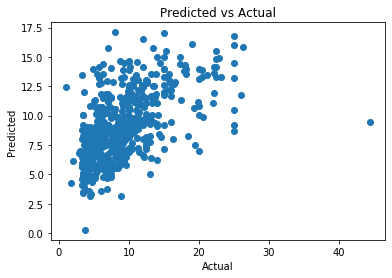

In [10]:
ypred = model.predict(X)
plt.scatter(Y,ypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

Normality

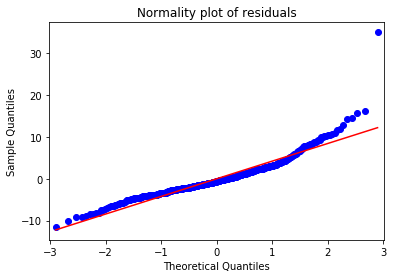

In [11]:
probplot = sm.ProbPlot(model.resid)
probplot.qqplot(line='s')
plt.title('Normality plot of residuals')
plt.show()

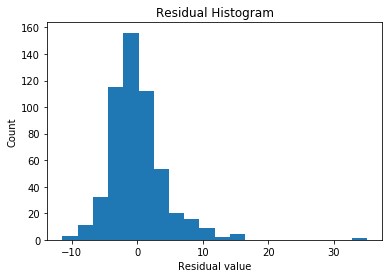

In [12]:
plt.hist(model.resid,bins=20)
plt.title('Residual Histogram')
plt.xlabel('Residual value')
plt.ylabel('Count')
plt.show()

Constant Variance

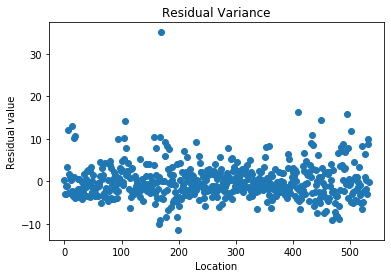

In [13]:
plt.scatter(model.resid.index,model.resid)
plt.title('Residual Variance')
plt.xlabel('Location')
plt.ylabel('Residual value')
plt.show()

Independence/Autocorrelation

In [14]:
res = DataFrame(model.resid,columns=['Residuals'])
res['Lag1'] = res.shift(periods=1)
res['Lag2'] = res['Residuals'].shift(periods=2)
res['Lag3'] = res['Residuals'].shift(periods=3)
res['Lag4'] = res['Residuals'].shift(periods=4)
res['Lag5'] = res['Residuals'].shift(periods=5)
res.corr()['Residuals']

Residuals    1.000000
Lag1        -0.004952
Lag2         0.099252
Lag3        -0.005456
Lag4         0.022164
Lag5         0.044308
Name: Residuals, dtype: float64

## Regression 2

In [15]:
#drop age
X = data.drop(columns=['WAGE','AGE'])
Y = data.WAGE

labels = ['Intercept']+ list(X.columns)
model1a = ols("Y ~ X",data).fit()
print(model1a.summary(xname=labels)) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     16.74
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           7.30e-36
Time:                        11:58:24   Log-Likelihood:                -1525.8
No. Observations:                 534   AIC:                             3084.
Df Residuals:                     518   BIC:                             3152.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3357      1.818      0.735   

In [16]:
#drop race
X = data.drop(columns=['WAGE','AGE','Race_2','Race_3'])
Y = data.WAGE

labels = ['Intercept']+ list(X.columns)
model1b = ols("Y ~ X",data).fit()
print(model1b.summary(xname=labels)) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     19.11
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           1.20e-36
Time:                        11:58:24   Log-Likelihood:                -1527.0
No. Observations:                 534   AIC:                             3082.
Df Residuals:                     520   BIC:                             3142.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8703      1.719      1.088   

In [17]:
#drop sectors
X = data.drop(columns=['WAGE','AGE','Race_2','Race_3','Sector_2','Sector_1'])
Y = data.WAGE

labels = ['Intercept']+ list(X.columns)
model1c = ols("Y ~ X",data).fit()
print(model1c.summary(xname=labels)) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     22.22
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           2.62e-37
Time:                        11:58:24   Log-Likelihood:                -1528.7
No. Observations:                 534   AIC:                             3081.
Df Residuals:                     522   BIC:                             3133.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8259      1.721      1.061   

In [18]:
#drop married
X = data.drop(columns=['WAGE','AGE','Race_2','Race_3','Sector_2','Sector_1','MARR'])
Y = data.WAGE

labels = ['Intercept']+ list(X.columns)
model1d = ols("Y ~ X",data).fit()
print(model1d.summary(xname=labels)) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     24.39
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           7.15e-38
Time:                        11:58:24   Log-Likelihood:                -1529.1
No. Observations:                 534   AIC:                             3080.
Df Residuals:                     523   BIC:                             3127.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9795      1.711      1.157   

In [19]:
#drop South
X = data.drop(columns=['WAGE','AGE','Race_2','Race_3','Sector_2','Sector_1','MARR','SOUTH'])
Y = data.WAGE

labels = ['Intercept']+ list(X.columns)
model1e = ols("Y ~ X",data).fit()
print(model1e.summary(xname=labels)) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     26.71
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           5.05e-38
Time:                        11:58:24   Log-Likelihood:                -1530.5
No. Observations:                 534   AIC:                             3081.
Df Residuals:                     524   BIC:                             3124.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5257      1.691      0.902   

In [20]:
table2 = sm.stats.anova_lm(model1e, typ=2)
table2

,sum_sq,df,F,PR(>F)
X,4426.804126,9.0,26.708932,5.050518e-38
Residual,9649.894556,524.0,NaN,NaN


In [21]:
table2['sum_sq'][0]/(table2['sum_sq'][0]+table2['sum_sq'][1])

0.31447743722363825

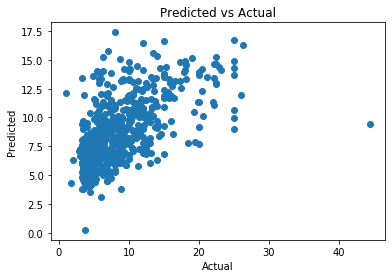

In [22]:
ypred = model1e.predict(X)
plt.scatter(Y,ypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

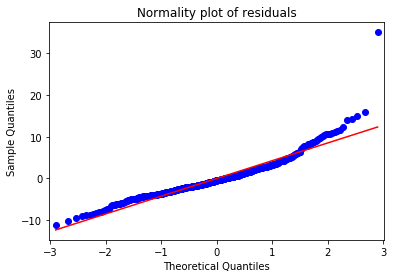

In [23]:
probplot = sm.ProbPlot(model1e.resid)
probplot.qqplot(line='s')
plt.title('Normality plot of residuals')
plt.show()

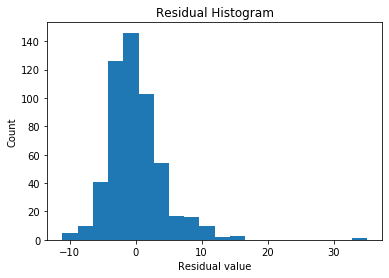

In [24]:
plt.hist(model1e.resid,bins=20)
plt.title('Residual Histogram')
plt.xlabel('Residual value')
plt.ylabel('Count')
plt.show()

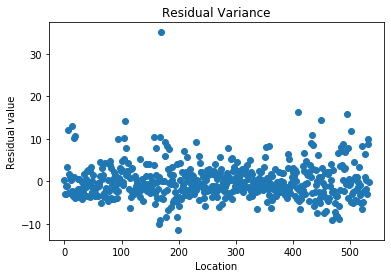

In [25]:
plt.scatter(model1e.resid.index,model.resid)
plt.title('Residual Variance')
plt.xlabel('Location')
plt.ylabel('Residual value')
plt.show()

In [26]:
res = DataFrame(model1e.resid,columns=['Residuals'])
res['Lag1'] = res.shift(periods=1)
res['Lag2'] = res['Residuals'].shift(periods=2)
res['Lag3'] = res['Residuals'].shift(periods=3)
res['Lag4'] = res['Residuals'].shift(periods=4)
res['Lag5'] = res['Residuals'].shift(periods=5)
res.corr()['Residuals']

Residuals    1.000000
Lag1         0.007833
Lag2         0.093376
Lag3        -0.012377
Lag4         0.018466
Lag5         0.045770
Name: Residuals, dtype: float64